In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [22]:
sfwtab = pd.read_csv(r'datafiles\sfw_scmu_35U_0-15_nu_eq_3', index_col=0)


In [23]:
#sfwtab = pd.concat((sfwtab_5,sfwtab_6, sfwtab_7), ignore_index=True)
#sfwtab=sfwtab_7



In [24]:
sfwtab.head()

,U,mu,nu,sq_det_SFW,SFW_ten,SFWxx,SFWxy,delta,ns,deltaError,nError
0,0.000010,(-4.998471107363971e-06+2.0617793916515091e-38j),(2.998314747071705-1.8096725025536814e-32j),(3.903904280885019e-06+7.473838029418303e-24j),[[-3.90390428e-06-7.47383803e-24j -2.55930211e...,(-3.903904280886941e-06-7.473838027327884e-24j),(-2.5593021104053117e-20+2.0470155228392846e-34j),[(1.5103056027659365e-06+9.347608878018931e-34...,"[(1.0025000073096222-1.6741642512150487e-32j),...",2.777365e-07,0.000089
1,0.441186,(-0.22051874544333372+2.832274031678039e-31j),(2.9981175159584663-5.502462415245091e-30j),(0.10936695249581802+3.747288868990342e-19j),[[-1.09366952e-01-3.74728887e-19j -3.04819698e...,(-0.10936695249581817-3.747288868990302e-19j),(-3.048196978924238e-18+1.4672410578323631e-33j),[(0.021518674140438586+1.9292104451419034e-35j...,"[(1.0001695849740537-5.5027975869231706e-30j),...",1.944131e-07,0.000106
2,0.882362,(-0.4410132466840179+5.050772607445578e-31j),(2.997851523490434-4.907382692698933e-30j),(0.17632855896562968+7.527787846244152e-19j),[[-1.76328559e-01-7.52778785e-19j -6.22757317e...,(-0.17632855896562769-7.527787846244161e-19j),(-6.22757316674549e-19+4.825319205969453e-34j),"[(0.04628252465689631-6.668390332242585e-34j),...","[(1.0003524035909743-4.8948359907159795e-30j),...",1.451712e-07,0.000122
3,1.323539,(-0.6614902621158919+2.408949227538531e-31j),(2.9975940016987837-1.5609750187779134e-30j),(0.22848410624221285+1.119442847009525e-18j),[[-2.28484106e-01-1.11944285e-18j 4.21723826e...,(-0.22848410624221147-1.119442847009522e-18j),(4.2172382605934124e-18+3.0723588082611963e-34j),"[(0.07601869012892341-8.241327265875843e-33j),...","[(1.0006403662641081-1.5545551702222554e-30j),...",1.389318e-07,0.000134
4,1.764715,(-0.8819332079325892-1.485059870132967e-31j),(2.9972288994693566+7.212701970240905e-31j),(0.27059631996210187+1.4812709394950404e-18j),[[-2.70596320e-01-1.48127094e-18j -2.47031937e...,(-0.2705963199621006-1.481270939495028e-18j),(-2.4703193692333665e-18-2.288160946763891e-34j),[(0.11100189934800817-5.8822721332866784e-34j)...,"[(1.001084547763365+7.5413583982257815e-31j), ...",4.282029e-07,0.000149


In [32]:
U = np.array(sfwtab.U)
mu=np.array(sfwtab.mu, dtype=complex)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx, dtype=complex)


In [33]:
xarr = np.array(sfwtab.U.loc[sfwtab.mu==sfwtab.mu.iloc[0]])
yarr = np.array(sfwtab.nu.loc[sfwtab.mu==sfwtab.mu.iloc[0]], dtype=complex)

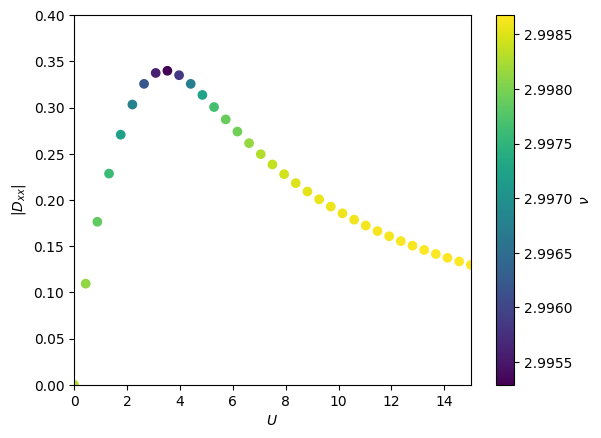

In [38]:
plt.xlabel(r'$U$')
plt.ylabel(r'$|D_{xx}|$')
plt.ylim(0,0.4)
plt.xlim(0,15)
plt.scatter(U[0:], np.abs(sfwxx[0:]), c=nu[0:])
plt.colorbar(label=r'$\nu$')

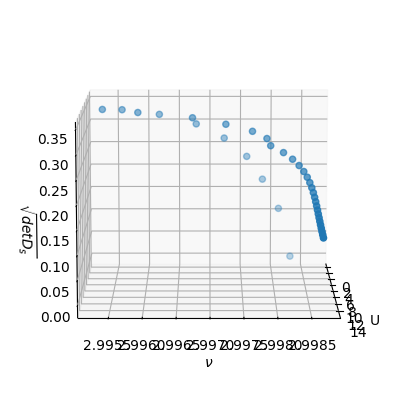

In [36]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()